In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sklearn
import matplotlib
import IPython
import matplotlib.pyplot as plt
from IPython.display import display
from scipy import sparse
import mglearn
import sys
from sklearn.model_selection import train_test_split
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
from mglearn.datasets import make_forge
from mglearn.plot_helpers import discrete_scatter


/Users/dkhamar/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/dkhamar/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
print("Python Version", sys.version)
print("Pandas Version", pd.__version__)
print("Matplotlib Version", matplotlib.__version__)
print("Scipy Version", sp.__version__)
print("IPython Version",IPython.__version__)
print("Scikit Learn Version", sklearn.__version__)

Python Version 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Pandas Version 0.25.1
Matplotlib Version 3.1.1
Scipy Version 1.3.1
IPython Version 7.8.0
Scikit Learn Version 0.21.3


Text(0, 0.5, 'Target')

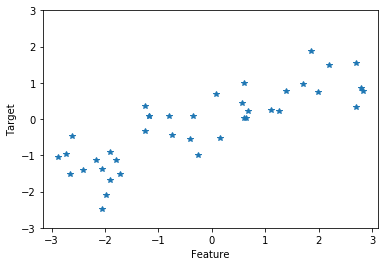

In [3]:
# Sample Data set
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, '*')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [4]:
# Load Breast Cancer Data and Analyze it
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("Cancer Keys:\n", cancer.keys())
print('Cancer Data Shape', cancer.data.shape)
print('', {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})
print(cancer.feature_names)


Cancer Keys:
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
Cancer Data Shape (569, 30)
 {'malignant': 212, 'benign': 357}
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [5]:
# Load Boston Data
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)
print(boston.feature_names)

# Convert Boston data into pandas data frame
df = pd.DataFrame(boston.data, columns=boston.feature_names)
#df.head()
#df.tail(5)

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
X, y = mglearn.datasets.load_extended_boston()
print(X.shape)
print(y.shape)


(506, 104)
(506,)


/Users/dkhamar/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


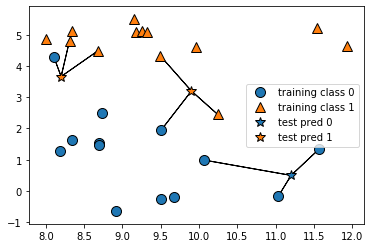

In [7]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [8]:
#Plot K_Neighbor Classisification

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier

from mglearn.datasets import make_forge
from mglearn.plot_helpers import discrete_scatter


def plot_knn_classification(n_neighbors=1):
    X, y = make_forge()

    X_test = np.array([[9.3, 3.66214339], [9.9, 3.2], [11.2, .5]])
    dist = euclidean_distances(X, X_test)
    closest = np.argsort(dist, axis=0)

    for x, neighbors in zip(X_test, closest.T):
        for neighbor in neighbors[:n_neighbors]:
            plt.arrow(x[0], x[1], X[neighbor, 0] - x[0],
                      X[neighbor, 1] - x[1], head_width=0, fc='k', ec='k')

    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    test_points = discrete_scatter(X_test[:, 0], X_test[:, 1], clf.predict(X_test), markers="*")
    training_points = discrete_scatter(X[:, 0], X[:, 1], y)
    plt.legend(training_points + test_points, ["training class 0", "training class 1",
                                               "test pred 0", "test pred 1"])


/Users/dkhamar/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


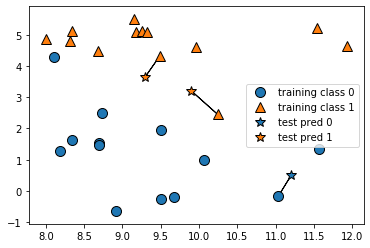

In [9]:
plot_knn_classification(n_neighbors=1)

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)
#training.accuracy

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
X, y = np.arange(10).reshape((5, 2)), range(5)
print(X)
list(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train)
print(X_test)
list(y_train)
list(y_test)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[[4 5]
 [0 1]
 [6 7]]
[[2 3]
 [8 9]]


[1, 4]

In [12]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
print("Test Set predictions :", clf.predict(X_train))

Test Set predictions : [0 0 0]


ValueError: Expected n_neighbors <= n_samples,  but n_samples = 5, n_neighbors = 9

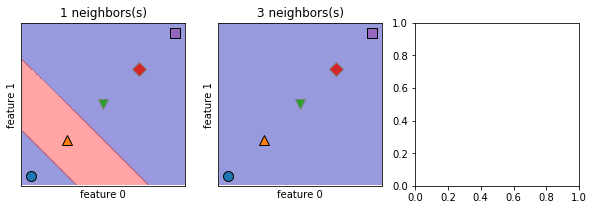

In [13]:
## Decision boundries created by nearest neighbors model for different values of n_neighbors

fig, axes = plt.subplots(1, 3, figsize=(10,3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:,1], y, ax=ax)
    ax.set_title("{} neighbors(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

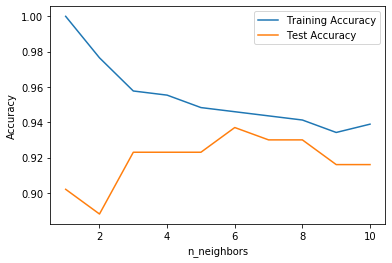

In [15]:
## KNeighbors Classification using Cancer Data Set

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="Training Accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

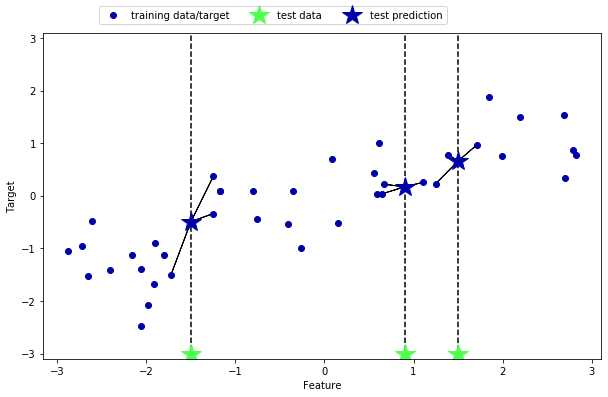

In [16]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

print("Test Set Prediction :", reg.predict(X_test))
print("Test Set R^2: {:2f}".format(reg.score(X_test, y_test)))

Test Set Prediction : [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test Set R^2: 0.834417


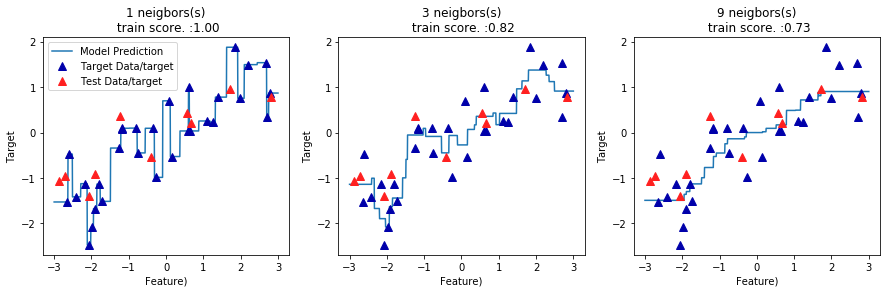

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))

line = np.linspace(-3, 3, 1000).reshape(-1,1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, '^', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title("{} neigbors(s)\n train score. :{:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("Feature)")
    ax.set_ylabel("Target")
    axes[0].legend(["Model Prediction", "Target Data/target", "Test Data/target"], loc="best")
    

In [19]:
### Linear Models ###

w[0]: 0.393906  b: -0.031804


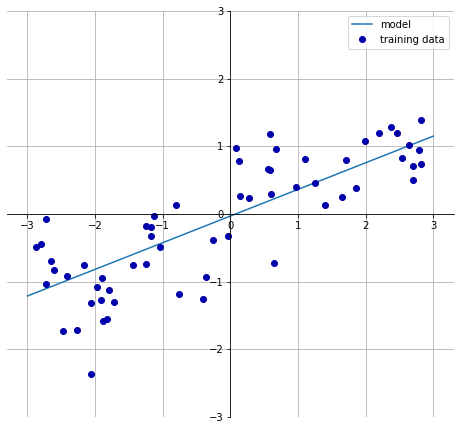

In [20]:
mglearn.plots.plot_linear_regression_wave()

In [21]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

print("lr.coef", lr.coef_)
print("lr.interceptd", lr.intercept_)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))



lr.coef [0.39390555]
lr.interceptd -0.031804343026759746
Training set score: 0.67
Test set score: 0.66


In [22]:
## Linear Regression Model using. Boston Data Set
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


In [23]:
from sklearn.linear_model import Ridge
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
ridge1 = Ridge().fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge1.score(X_train, y_train)))
print("Testing set score: {:.2f}".format(ridge1.score(X_test, y_test)))

Training set score: 0.89
Testing set score: 0.75


### 

In [24]:
from sklearn.linear_model import Ridge
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
ridge10 = Ridge(alpha=.1).fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Testing set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.93
Testing set score: 0.77


In [25]:
from sklearn.linear_model import Lasso
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lasso = Lasso(alpha=0.01, max_iter=10000000).fit(X_train, y_train)

print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Testing set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used :", np.sum(lasso.coef_ !=0))

Training set score: 0.90
Testing set score: 0.77
Number of features used : 33


In [26]:
####Liner Regression for Classifications

/Users/dkhamar/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
/Users/dkhamar/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/dkhamar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


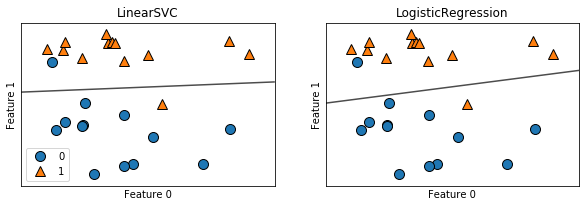

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    axes[0].legend()

In [28]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test =train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Traing Set Score : {:.3f}".format(logreg.score(X_train, y_train)))
print("Test Set Score : {:.3f}".format(logreg.score(X_test, y_test)))

Traing Set Score : 0.953
Test Set Score : 0.958


/Users/dkhamar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [29]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Traing Set Score : {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test Set Score : {:.3f}".format(logreg100.score(X_test, y_test)))

Traing Set Score : 0.972
Test Set Score : 0.965


/Users/dkhamar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [30]:
logreg10000 = LogisticRegression(C=10000).fit(X_train, y_train)
print("Traing Set Score : {:.3f}".format(logreg10000.score(X_train, y_train)))
print("Test Set Score : {:.3f}".format(logreg10000.score(X_test, y_test)))

Traing Set Score : 0.977
Test Set Score : 0.965


/Users/dkhamar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
logreg1 = LogisticRegression(C=1).fit(X_train, y_train)
print("Traing Set Score : {:.3f}".format(logreg1.score(X_train, y_train)))
print("Test Set Score : {:.3f}".format(logreg1.score(X_test, y_test)))

Traing Set Score : 0.953
Test Set Score : 0.958


/Users/dkhamar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


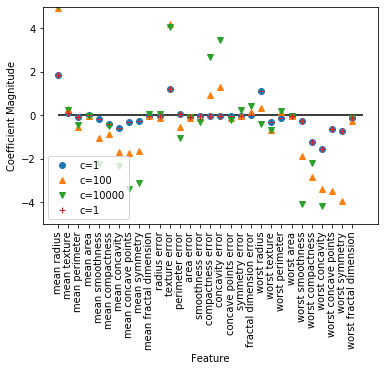

In [32]:
plt.plot(logreg.coef_.T, 'o', label="c=1")
plt.plot(logreg100.coef_.T, '^', label="c=100")
plt.plot(logreg10000.coef_.T, 'v', label="c=10000")
plt.plot(logreg1.coef_.T, '+', label="c=1")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Feature")
plt.ylabel("Coefficient Magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)

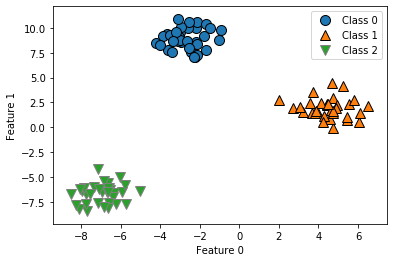

In [33]:
###Liniear Model for Multiclass

from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [34]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient Shape: ", linear_svm.coef_.shape)
print("Intercept Shape: ", linear_svm.intercept_.shape)

Coefficient Shape:  (3, 2)
Intercept Shape:  (3,)


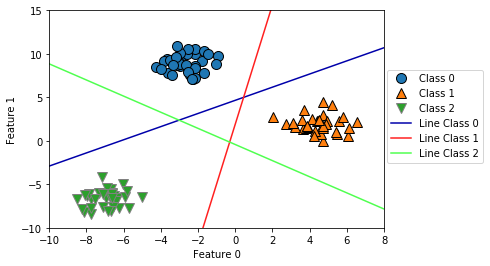

In [35]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line Class 0', 'Line Class 1', 'Line Class 2'], loc=(1.01, 0.3))

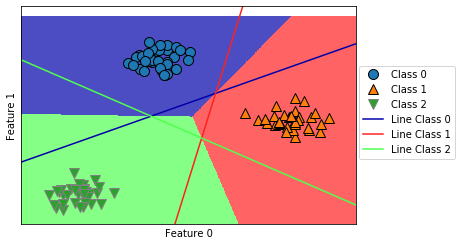

In [36]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line Class 0', 'Line Class 1', 'Line Class 2'], loc=(1.01, 0.3))

In [37]:
## Decision Tree 

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_tesst, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy Training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy Tessting set: {:.3f}".format(tree.score(X_test, y_test)))


Accuracy Training set: 1.000
Accuracy Tessting set: 0.937


In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_tesst, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy Training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy Tessting set: {:.3f}".format(tree.score(X_test, y_test)))



Accuracy Training set: 0.988
Accuracy Tessting set: 0.951


In [39]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["maligant", "benign"], feature_names=cancer.feature_names, impurity=False, filled=True)

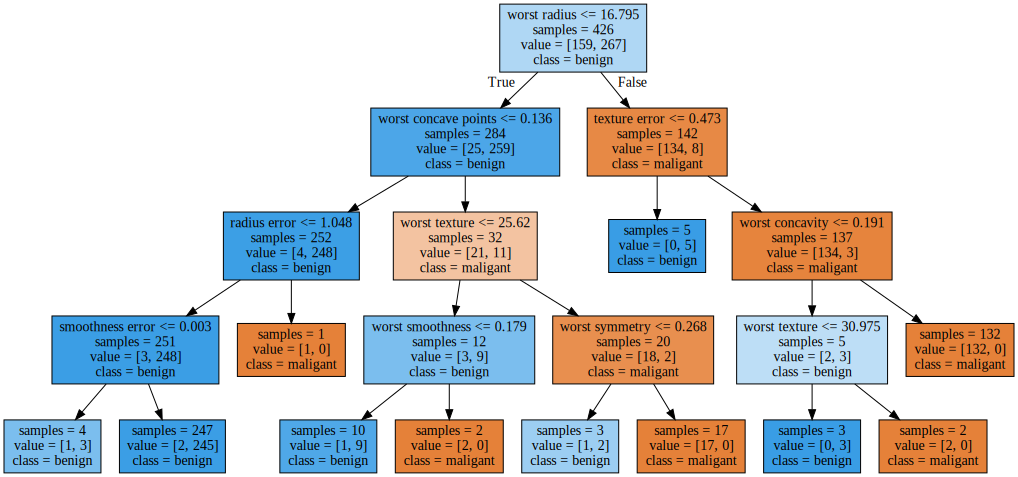

In [40]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


In [41]:
print("Feature Importance")
print(tree.feature_importances_)

Feature Importance
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


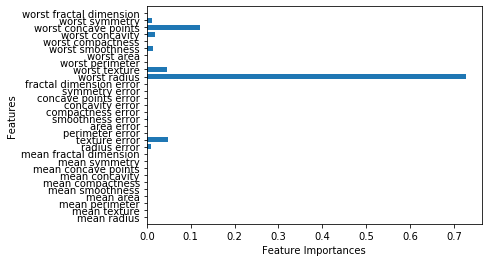

In [42]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature Importances")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


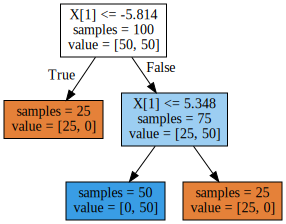

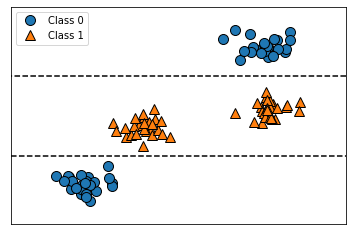

In [43]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0, 0.5, 'Price')

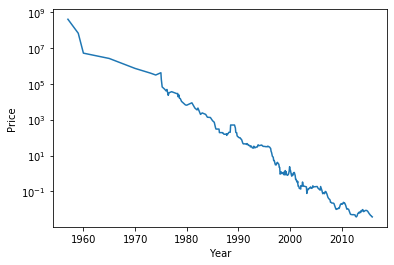

In [44]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price")

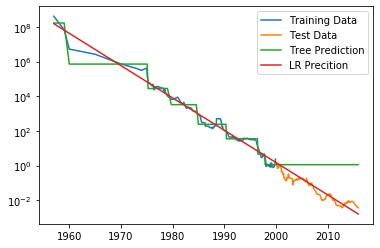

In [45]:
from sklearn.tree import DecisionTreeRegressor

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >=2000]

X_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

plt.semilogy(data_train.date, data_train.price, label="Training Data")
plt.semilogy(data_test.date, data_test.price, label="Test Data")
plt.semilogy(ram_prices.date, price_tree, label="Tree Prediction")
plt.semilogy(ram_prices.date, price_lr, label="LR Precition")
plt.legend()

Acccuracy on Training 0.995
Acccuracy on Testing 0.929


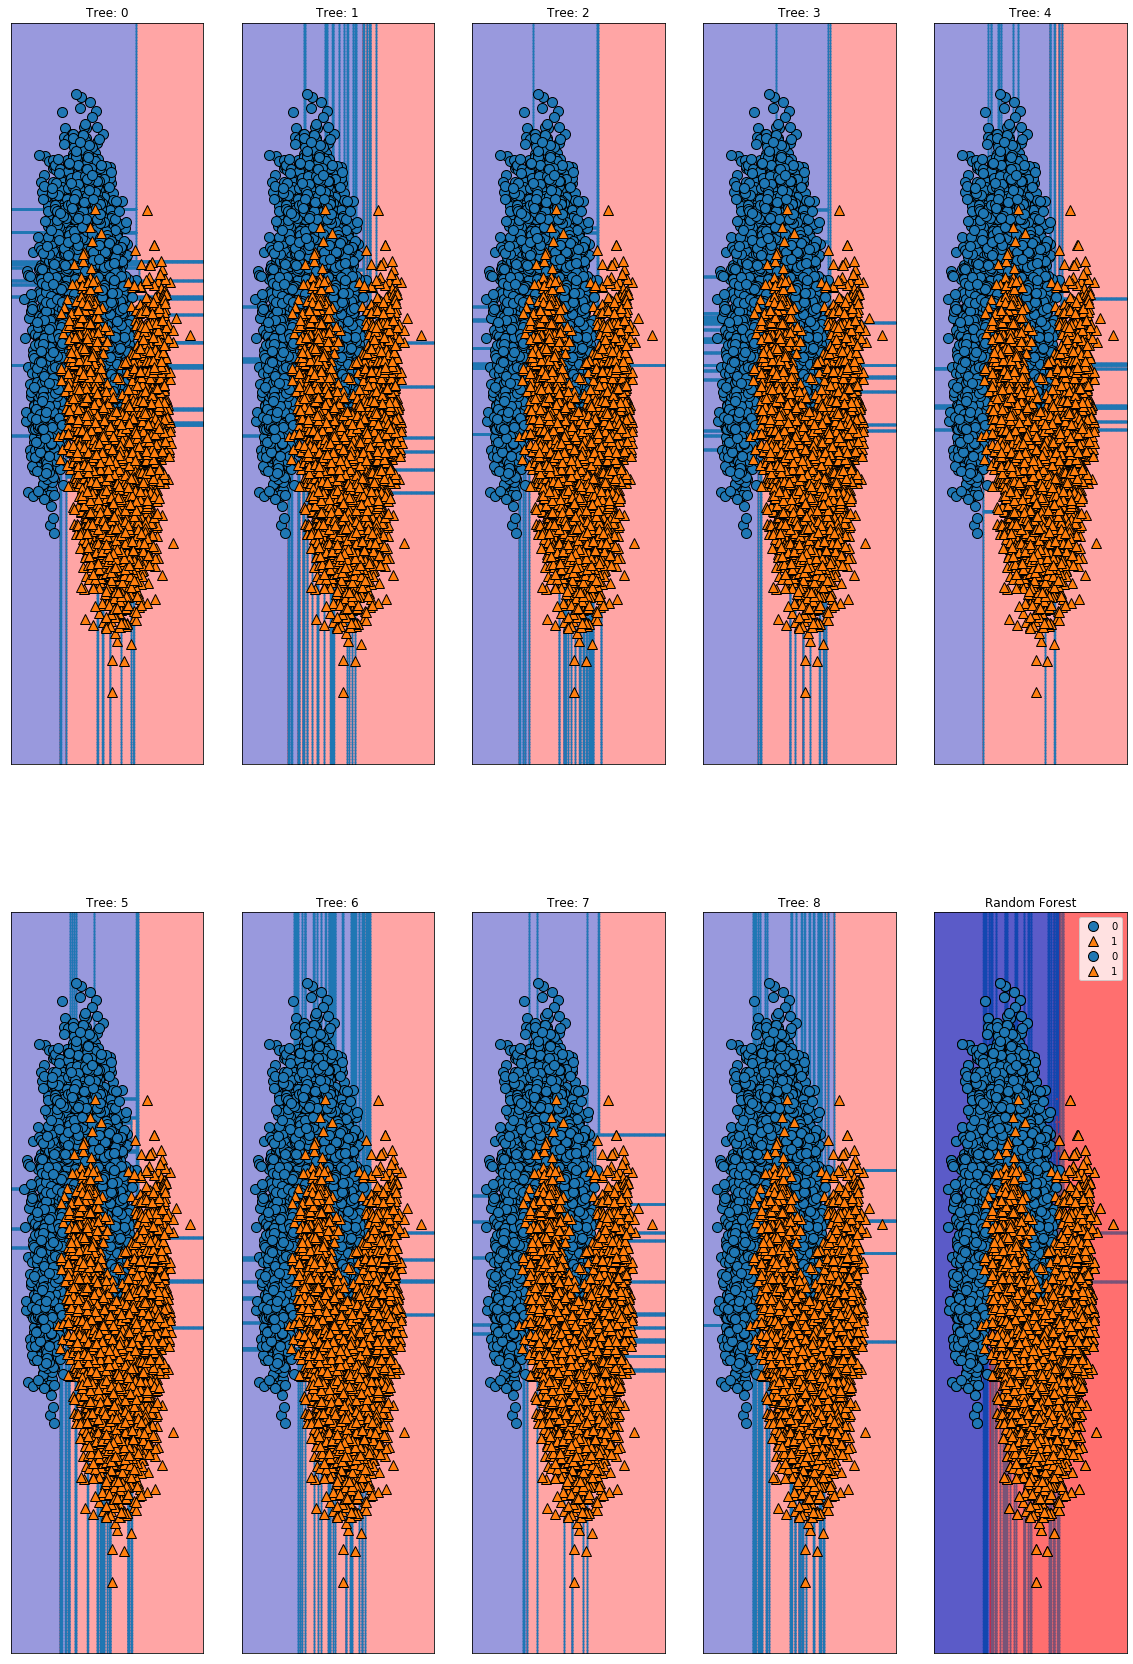

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.25, random_state=3)
##X = X[:, None]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
forest = RandomForestClassifier(n_estimators=10, random_state=2)
forest.fit(X_train, y_train)

fig, axes = plt.subplots(2, 5, figsize=(20, 30))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree: {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1,-1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.legend()
print("Acccuracy on Training {:.3f}".format(forest.score(X_train, y_train)))
print("Acccuracy on Testing {:.3f}".format(forest.score(X_test, y_test)))

Acccuracy on Training 1.000
Acccuracy on Testing 0.972


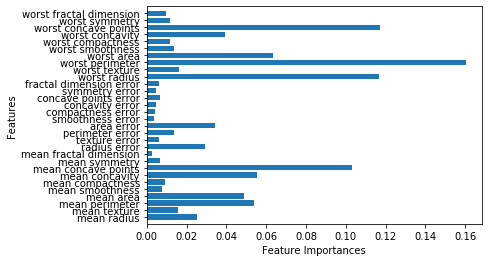

In [47]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Acccuracy on Training {:.3f}".format(forest.score(X_train, y_train)))
print("Acccuracy on Testing {:.3f}".format(forest.score(X_test, y_test)))
plot_feature_importances_cancer(forest)

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on Training Data Set: {:.2f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on Testing: {:.2f}".format(gbrt.score(X_test, y_test)))


Accuracy on Training Data Set: 1.00
Accuracy on Testing: 0.97


In [49]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on Training Data Set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on Testing: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on Training Data Set: 0.991
Accuracy on Testing: 0.972


In [50]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=.5)
gbrt.fit(X_train, y_train)

print("Accuracy on Training Data Set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on Testing: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on Training Data Set: 1.000
Accuracy on Testing: 0.972


Accuracy on Training Data Set: 1.000
Accuracy on Testing: 0.972


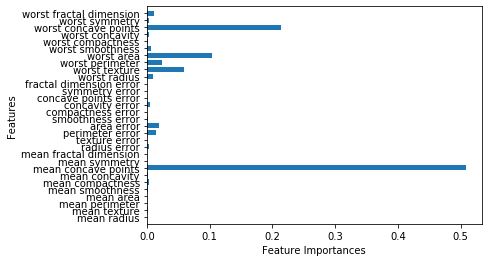

In [51]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=.5)
gbrt.fit(X_train, y_train)

print("Accuracy on Training Data Set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on Testing: {:.3f}".format(gbrt.score(X_test, y_test)))

plot_feature_importances_cancer(gbrt)

Text(0, 0.5, 'Feature 1')

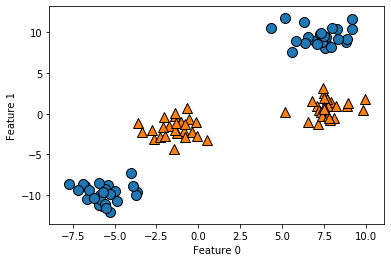

In [52]:
X, y = make_blobs(centers=4, random_state=8)
y = y%2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

/Users/dkhamar/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'Feature 1')

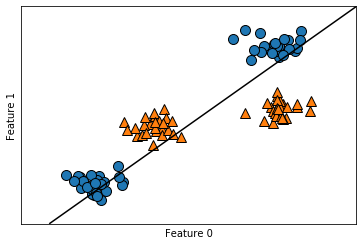

In [53]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0.5, 0, 'Feature 1 ** 2')

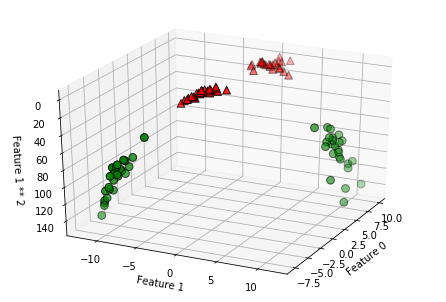

In [54]:
X_new = np.hstack([X, X[:, 1:] ** 2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c= 'g', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 1 ** 2")

/Users/dkhamar/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'Feature 1 ** 2')

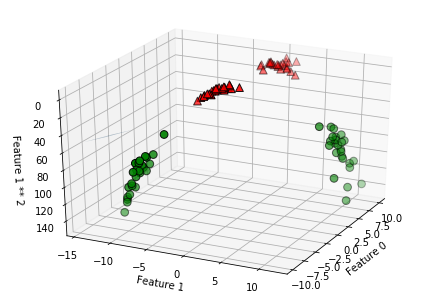

In [55]:
linear_svm_3d = LinearSVC().fit(X_new, y)

coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min()-2, X_new[:, 0].min()+2, 50)
yy = np.linspace(X_new[:, 1].min()-2, X_new[:, 1].min()+2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)


ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c= 'g', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 1 ** 2")

Text(0, 0.5, 'Feature 1')

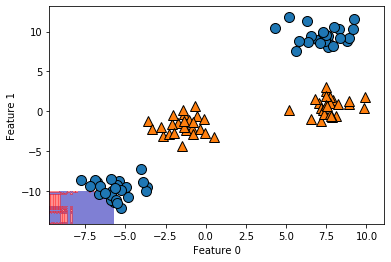

In [56]:
ZZ == YY **2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

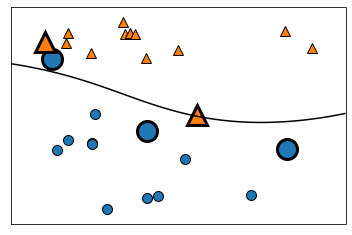

In [57]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
sv = svm.support_vectors_ 
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=20, markeredgewidth=3)

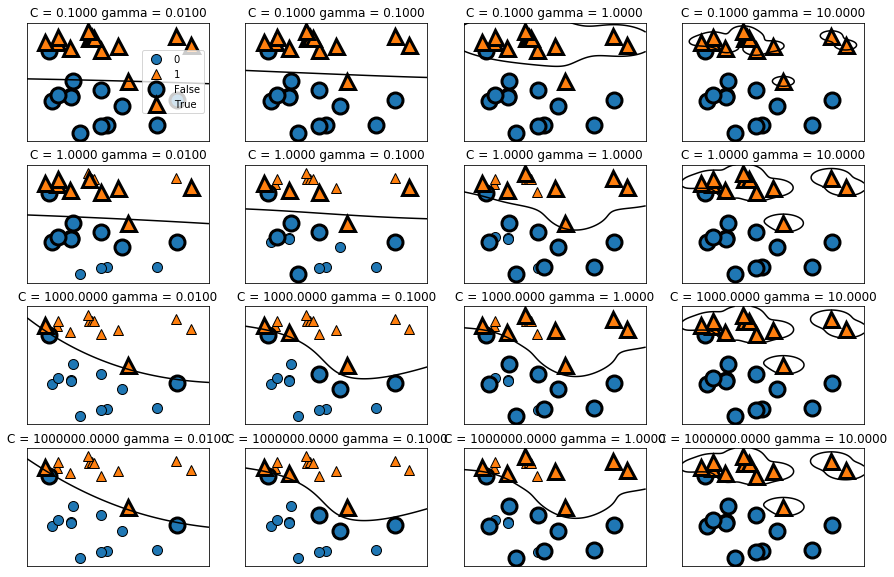

In [58]:
fig, axes = plt.subplots(4, 4, figsize=(15,10))
for ax, C in zip(axes, [-1, 0, 3, 6]):
    for a, gamma in zip(ax, range(-2,2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        axes[0, 0].legend()

In [59]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svc = SVC()
svc.fit(X_train, y_train)
print("Accuracy on training data set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on testing data set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training data set: 1.00
Accuracy on testing data set: 0.63


/Users/dkhamar/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [60]:
min_on_training = X_train.min(axis=0)
range_on_training = (X_train - min_on_training).max(axis=0)
X_train_scaled = (X_train - min_on_training) / range_on_training
print(X_train_scaled.min(axis=0))
print(X_train_scaled.max(axis=0))

X_test_scaled = (X_test - min_on_training) / range_on_training

svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.4f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on testing set: {:.4f}".format(svc.score(X_test_scaled, y_test)))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Accuracy on training set: 0.9484
Accuracy on testing set: 0.9510


/Users/dkhamar/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [61]:
svc = SVC(C=1000, gamma=.01)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.4f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on testing set: {:.4f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.9859
Accuracy on testing set: 0.9790


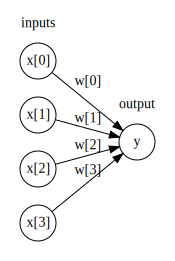

In [62]:
display(mglearn.plots.plot_logistic_regression_graph())

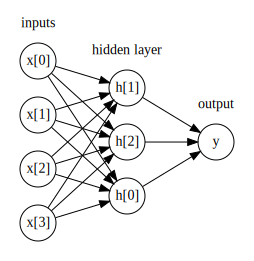

In [63]:
display(mglearn.plots.plot_single_hidden_layer_graph())

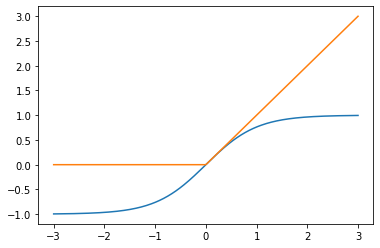

In [64]:
line = np.linspace(-3, 3, 300)
plt.plot(line, np.tanh(line), label='tanh')
plt.plot(line, np.maximum(line, 0), label='Relu')

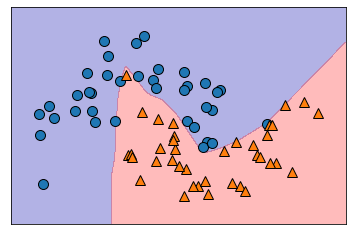

In [66]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

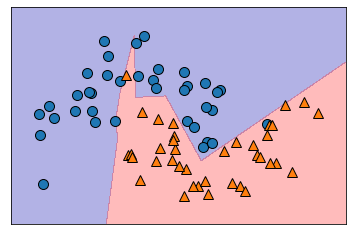

In [67]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

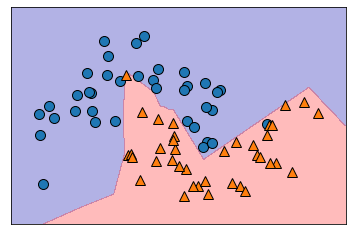

In [68]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

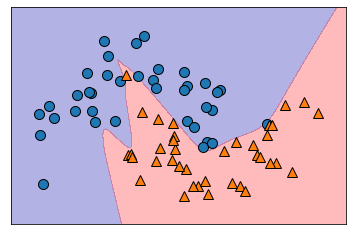

In [69]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, activation='tanh', hidden_layer_sizes=[10, 10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

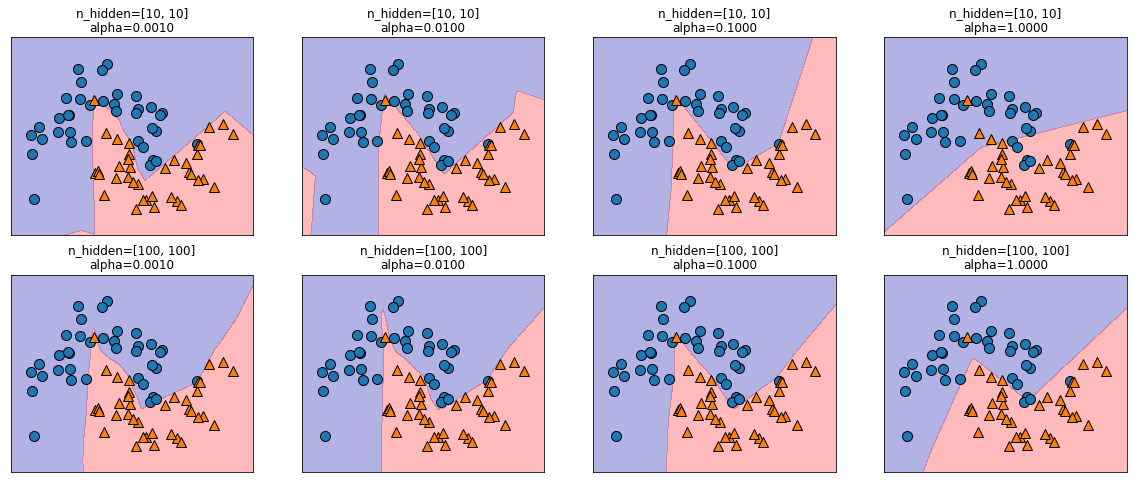

In [70]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

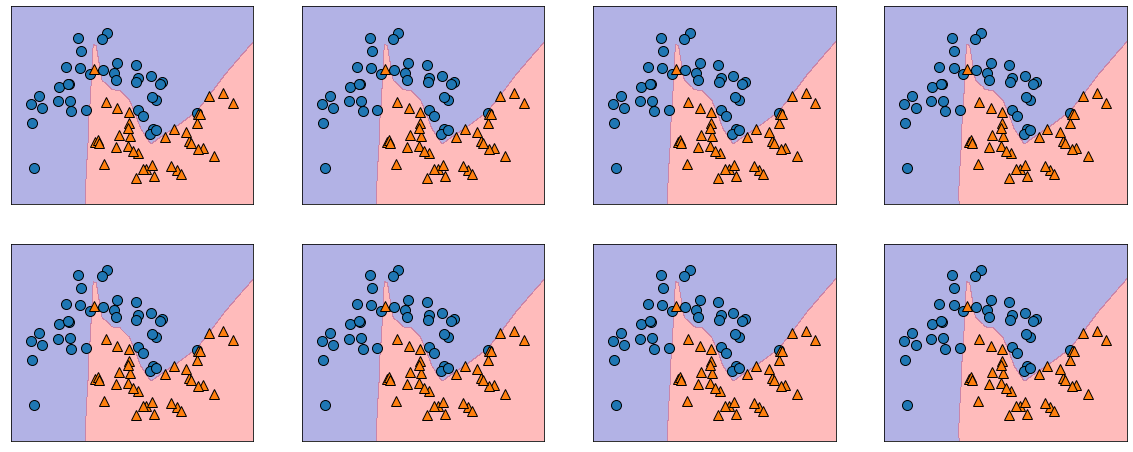

In [71]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

In [72]:
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [73]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train, y_train)
print("Accuracy on Training data: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on Testing data: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on Training data: 0.93
Accuracy on Testing data: 0.93


In [74]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)

X_train_scaled = (X_train - mean_on_train)/std_on_train
X_test_scaled = (X_test - mean_on_train)/std_on_train

mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on Training data: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on Testing data: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on Training data: 1.000
Accuracy on Testing data: 0.972


In [75]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on Training data: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on Testing data: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on Training data: 0.988
Accuracy on Testing data: 0.972


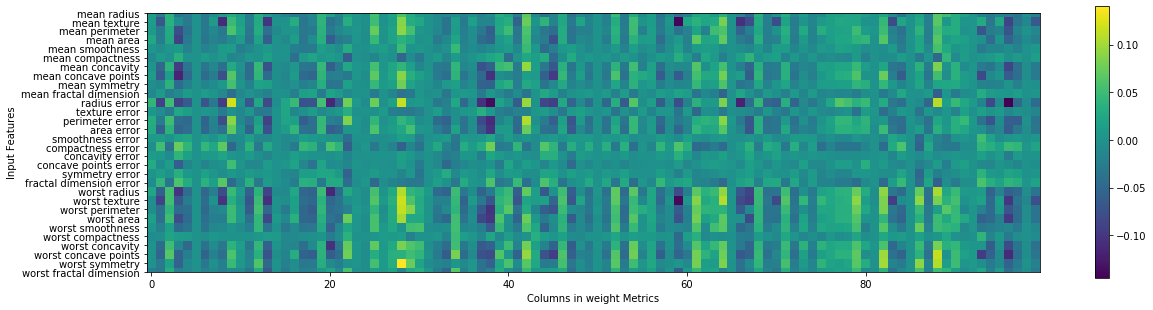

In [76]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight Metrics")
plt.ylabel("Input Features")
plt.colorbar()

In [79]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

y_named = np.array(["blue", "red"])[y]

X_train, X_test, y_train, y_test = train_test_split(X, y_named, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("X_test shape :{}".format(X_test.shape))
print("Decision Function shape: {}".format(gbrt.decision_function(X_test).shape))
print("Decision Function values (10): \n", gbrt.decision_function(X_test)[:10])
print("Threshold Decision Function \n", gbrt.decision_function(X_test)>0)
print("Predictions \n", gbrt.predict(X_test))

X_test shape :(25, 2)
Decision Function shape: (25,)
Decision Function values (10): 
 [ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106
 -7.69097177  4.11001634  1.10753883  3.40782247]
Threshold Decision Function 
 [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions 
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']
